# Introducción Machine Learning en Python

Cargamos datasets con información de admisiones a hospitales de enfermos de diabetes. El objetivo es, una vez limpiado el dataset, estudiarlo para extraer el máximo número de insights de los datos.

## 1. Cargar librerías

In [1]:
%matplotlib inline

import re
import random
from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
sns.set(color_codes=True)

from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, make_scorer
from sklearn.grid_search import GridSearchCV, ParameterGrid
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, auc

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## 2. Lectura de datos

In [2]:
dfPresDigital = pd.read_csv("data/dataBasePrestDigital.csv",sep=';')




In [3]:
dfPresDigital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435083 entries, 0 to 435082
Data columns (total 20 columns):
mes                  435083 non-null int64
cliente              435083 non-null int64
estadoCliente        435083 non-null object
rngEdad              435083 non-null object
genero               435083 non-null object
rngSueldo            435083 non-null object
procedencia          435083 non-null object
operDigital          435083 non-null object
trxDigitalUm         435083 non-null int64
promTrxDig3Um        435083 non-null float64
recCamp              435083 non-null int64
frecCamp             435083 non-null int64
tenTarjeta           435083 non-null object
promConsBanco3Um     435083 non-null float64
promSaldoBanco3Um    435083 non-null float64
promSaldoTc3Um       435083 non-null float64
promSaldoPrest3Um    435083 non-null float64
sowTcUm              435083 non-null float64
sowPrestUm           435083 non-null int64
ventaPrestDig        435083 non-null int64
dtypes: fl

### comprobar correcta lectura de los datos

In [4]:
dfPresDigital.head(3)

,mes,cliente,estadoCliente,rngEdad,genero,rngSueldo,procedencia,operDigital,trxDigitalUm,promTrxDig3Um,recCamp,frecCamp,tenTarjeta,promConsBanco3Um,promSaldoBanco3Um,promSaldoTc3Um,promSaldoPrest3Um,sowTcUm,sowPrestUm,ventaPrestDig
0,201608,1,A,<35-45],M,<3500-4500],lima,NN,0,0.000000,1,3,TC-TD,5844.17,5844.17,5844.170000,0.0,1.0,0,0
1,201608,2,A,<25-35],M,<3500-4500],lima,BXI-BM,200,192.666667,1,3,TC-TD,0.00,0.00,2701.470000,0.0,0.0,0,0
2,201608,3,A,<35-45],F,<4500-6000],lima,BM,407,332.333333,1,3,TD,0.00,0.00,3148.746667,0.0,0.0,0,0


### estudiar las dimensiones del dataset

> Bloque con sangría



In [5]:
print("Número de filas: " + str(dfPresDigital.shape[0]))
print("Número de columnas: " + str(dfPresDigital.shape[1]))

Número de filas: 435083
Número de columnas: 20


In [6]:
dfPresDigital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435083 entries, 0 to 435082
Data columns (total 20 columns):
mes                  435083 non-null int64
cliente              435083 non-null int64
estadoCliente        435083 non-null object
rngEdad              435083 non-null object
genero               435083 non-null object
rngSueldo            435083 non-null object
procedencia          435083 non-null object
operDigital          435083 non-null object
trxDigitalUm         435083 non-null int64
promTrxDig3Um        435083 non-null float64
recCamp              435083 non-null int64
frecCamp             435083 non-null int64
tenTarjeta           435083 non-null object
promConsBanco3Um     435083 non-null float64
promSaldoBanco3Um    435083 non-null float64
promSaldoTc3Um       435083 non-null float64
promSaldoPrest3Um    435083 non-null float64
sowTcUm              435083 non-null float64
sowPrestUm           435083 non-null int64
ventaPrestDig        435083 non-null int64
dtypes: fl

## 3. Data Wrangling

### cambiar los nombres de las columnas para que cumplan buenas prácticas

Consideramos buenas prácticas nombrar a las columnas con "ALL_" en minusculas

In [7]:
columnsNamePresDigital =["mes","cliente","estadoCliente","rngEdad","genero","rngSueldo","procedencia","operDigital","trxDigitalUm",
                         "promTrxDig3Um","recCamp","frecCamp","tenTarjeta","promConsBanco3Um","promSaldoBanco3Um","promSaldoTc3Um",
                         "promSaldoPrest3Um","sowTcUm","sowPrestUm","ventaPrestDig"]

dfPresDigital.columns = columnsNamePresDigital

### estudiar el formato de las variables, ver cuáles se deberían modificar y modificarlas cuando se considere oportuno

Transformar los id a texto

In [8]:
columnsId = ["cliente"]

for columnName in columnsId:
  dfPresDigital[columnName] = dfPresDigital[columnName].apply(str)

Para las variables categorícas se cambia el caracter "?" por "NaN"

In [9]:
#Variables categoricas
dfPresDigital.select_dtypes("object").columns

Index(['cliente', 'estadoCliente', 'rngEdad', 'genero', 'rngSueldo',
       'procedencia', 'operDigital', 'tenTarjeta'],
      dtype='object')

In [10]:
#Reemplazamos los valores que deben ser nulos
for columnName in dfPresDigital.select_dtypes("object").columns:
    dfPresDigital[columnName] = dfPresDigital[columnName].replace(["?"], [np.nan])
    dfPresDigital[columnName] = dfPresDigital[columnName].replace(["None"], [np.nan])

### estudiar si hay registros repetidos

In [11]:
#La primary key es cliente, entonces
dfPresDigital[["cliente"]].duplicated().any()

False

No existen valores duplicados por la llave

### estudiar si hay variables que siempre o prácticamente siempre toman el mismo valor: tomar siempre el mismo valor no aporta información al modelo

Definimos las variables numéricas y categóricas (despues se irán eliminando algunas en el camino)

In [12]:
columnsNumeric = ["mes","trxDigitalUm","promTrxDig3Um","recCamp","frecCamp","promConsBanco3Um","promSaldoBanco3Um",
                  "promSaldoTc3Um","promSaldoPrest3Um","sowTcUm","sowPrestUm"]

columnsString = ["estadoCliente", "rngEdad", "genero", "rngSueldo","procedencia", "operDigital", "tenTarjeta"]

columnTarget = "target"

Estudiamos las variables numéricas con la varianza, a varianza más cerca de 0, dicha varianza no aporta al modelo.

In [13]:
dfPresDigital[columnsNumeric].var().sort_values(ascending = False)

promSaldoPrest3Um    6.026474e+07
promSaldoTc3Um       2.646466e+07
promConsBanco3Um     2.134199e+07
promSaldoBanco3Um    6.415323e+06
trxDigitalUm         1.651261e+04
promTrxDig3Um        1.309557e+04
recCamp              1.302544e+03
frecCamp             1.321600e+00
sowTcUm              8.441807e-02
sowPrestUm           2.298412e-06
mes                  0.000000e+00
dtype: float64

La variable que tiene varianza más pequeña es "mes" ya que es una fecha unica, no influye en el analisis por lo que hay que eliminarla.

Otra variables es que tenemos que eliminar es "sowPrestUm"

Analizamos las demas variables cuyas varianzas sean las menores

Realizamos un analisis de frecuencia para ver donde se acumula

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F37D0AA20>,
      dtype=object)

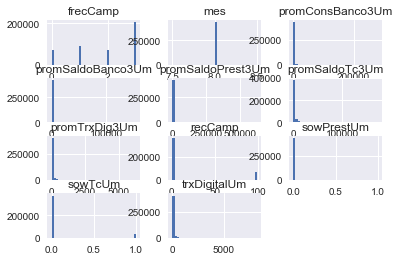

In [14]:
dfPresDigital[columnsNumeric].hist(bins = 40)

A las siguientes variables hacemos un analisis de frecuencia:

"promSaldoPrest3Um",
"promSaldoTc3Um", 
"promConsBanco3Um",
"promSaldoBanco3Um",
"trxDigitalUm",
"promTrxDig3Um",
"recCamp",
"sowTcUm",
"sowPrestUm"



In [15]:
for columnName in ["promSaldoPrest3Um","promSaldoTc3Um","promConsBanco3Um","promSaldoBanco3Um",
                   "trxDigitalUm","promTrxDig3Um","recCamp","sowTcUm","sowPrestUm"]:
  print(dfPresDigital.fillna("--NULL").groupby(columnName)[columnName].count() / dfPresDigital.shape[0] * 100)
  print("\n")

promSaldoPrest3Um
0.000000         81.129118
0.006670          0.000460
0.013300          0.000460
0.016700          0.000460
0.040000          0.000460
0.133333          0.000230
0.150000          0.000230
0.233333          0.000230
0.556667          0.000230
0.726667          0.000230
1.333333          0.000460
1.403333          0.000230
1.630000          0.000460
1.916667          0.000460
2.080000          0.000230
2.283333          0.000230
2.310000          0.000230
2.540000          0.000460
3.580000          0.000230
3.640000          0.000230
3.663333          0.000230
3.786667          0.000230
3.836667          0.000230
4.263333          0.000230
4.380000          0.000230
4.500000          0.000230
5.266667          0.000230
5.323333          0.000230
5.616667          0.000230
6.666667          0.001609
                   ...    
243310.116700     0.000230
261841.533300     0.000230
262932.266700     0.000230
263435.000000     0.000230
263540.020000     0.000230
264066.256

recCamp
1     79.753518
2      2.719481
3      1.321357
99    16.205644
Name: recCamp, dtype: float64


sowTcUm
0.000000    86.124487
0.000002     0.000230
0.000003     0.000230
0.000007     0.000230
0.000011     0.000230
0.000012     0.000230
0.000019     0.000230
0.000023     0.000230
0.000028     0.000230
0.000033     0.000230
0.000042     0.000230
0.000055     0.000230
0.000056     0.000230
0.000079     0.000230
0.000092     0.000230
0.000098     0.000230
0.000105     0.000230
0.000109     0.000230
0.000112     0.000230
0.000114     0.000230
0.000115     0.000230
0.000116     0.000230
0.000117     0.000230
0.000121     0.000230
0.000122     0.000230
0.000135     0.000230
0.000150     0.000230
0.000151     0.000230
0.000152     0.000230
0.000160     0.000230
              ...    
0.999997     0.000230
0.999997     0.000230
0.999997     0.000230
0.999997     0.000230
0.999997     0.000230
0.999998     0.000230
0.999998     0.000230
0.999998     0.000230
0.999998     0.000230
0.999998

Solo la variable "sowPrestUm" se acumulan en 0 en mas del 90% pero las demas variables no, lo tendremos en cuenta en la exploración de datos para descartarlas de ser necesario con más evidencia (mean encoding).

#### Para las variables categoricas vemos sus distribuciones

In [16]:
for columnName in columnsString:
  print(dfPresDigital.fillna("--NULL").groupby(columnName)[columnName].count().sort_values(ascending = False) / dfPresDigital.shape[0] * 100)
  print("\n")

estadoCliente
A    90.072239
I     9.879494
M     0.048267
Name: estadoCliente, dtype: float64


rngEdad
<25-35]    30.703567
<35-45]    30.573936
<45-55]    21.062648
>55        13.488691
<=25        4.171158
Name: rngEdad, dtype: float64


genero
M    56.220307
F    43.779693
Name: genero, dtype: float64


rngSueldo
<1000-2500]    42.929050
<3500-4500]    20.843379
<=1000         15.002195
>6000          12.748602
<4500-6000]     8.476773
Name: rngSueldo, dtype: float64


procedencia
provincia    57.016707
lima         42.983293
Name: procedencia, dtype: float64


operDigital
NN        73.675368
BXI       13.499263
BXI-BM     6.618967
BM         6.206402
Name: operDigital, dtype: float64


tenTarjeta
TD       51.660488
TC-TD    23.775004
NN       19.590285
TC        4.974223
Name: tenTarjeta, dtype: float64




Consideramos que si se acumula mayor o igual del 90% en su distribución la variable no aporta  
Agregamos a la lista "columnsStringDrop" aquellas donde se acumule más del 90%

In [17]:
limite = 0.9
columnsStringDrop = []
for columnName in columnsString:
  tmp = dfPresDigital.fillna("NULL").groupby(columnName)[columnName].count() / dfPresDigital.shape[0]
  for value in tmp:
    if value >= limite:
      columnsStringDrop.append(columnName)
      break

columnsString = list(set(columnsString) - set(columnsStringDrop))
print("variables donde se acumula en un solo rango más del 90% de población (incluyendo nulos): " + str(columnsStringDrop))
print("Variables categoricas: " + str(columnsString))

variables donde se acumula en un solo rango más del 90% de población (incluyendo nulos): ['estadoCliente']
Variables categoricas: ['procedencia', 'rngEdad', 'rngSueldo', 'genero', 'operDigital', 'tenTarjeta']


In [18]:
dfPresDigital["genero"] = dfPresDigital["genero"].replace("Unknown/Invalid", np.nan)

In [19]:
for columnName in columnsString:
  dfPresDigital[columnsString] = dfPresDigital[columnsString].fillna("NONE")

Para la variable genero reemplazamos el valor undefined por NULL

Graficamos con un diagrama de barras cada variable categoirica sin considerar las que tienen acumulación >= 90% en un rango

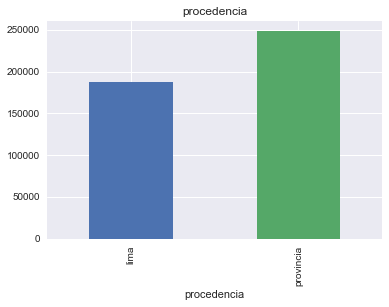

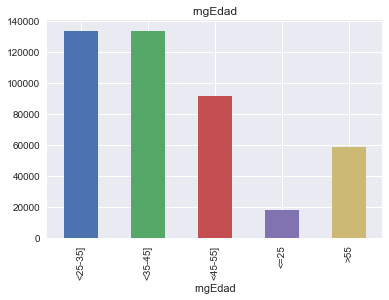

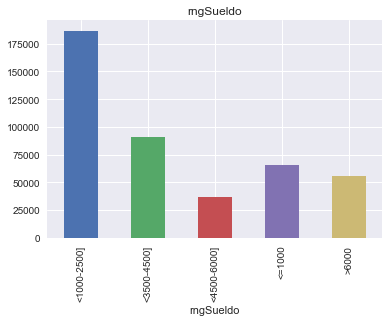

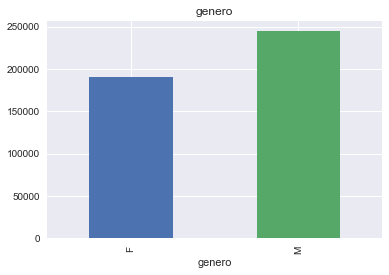

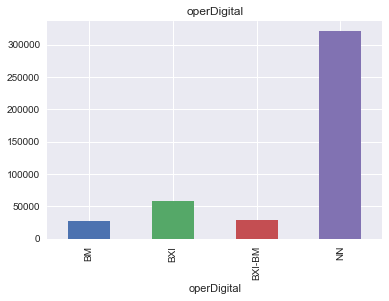

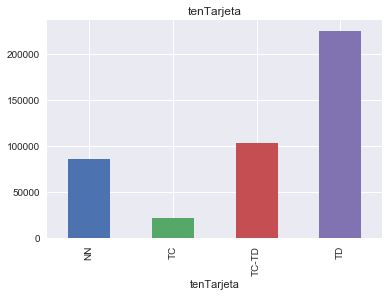

In [20]:
for columnName in columnsString:
  plt.title(columnName)
  dfPresDigital.groupby(columnName)[columnName].count().plot(kind = "bar")
  plt.show()

No se observa que existan variables cuyos valores en su mayoria sean numericas, pero igual daremos un vistazo al porcentaje de numericas, no numericas y nulos de algunos "operDigital" y "procedencia" a manera de ejemplo.

In [21]:
def changeType(x):
  try:
    a = float(x)
    if(np.isnan(a)):
      return -1
    else:
      return 1
  except:
    return 0
  
def diagToNumber(x):
  try:
    a = float(x)
    if(np.isnan(a)):
      return float("nan")
    else:
      return a
  except:
    return float("nan")

In [22]:
for columnName in ["operDigital","procedencia"]:
  numNumeric = dfPresDigital[dfPresDigital[columnName].apply(changeType) == 1].shape[0]
  numString = dfPresDigital[dfPresDigital[columnName].apply(changeType) == 0].shape[0]
  numNull = dfPresDigital[dfPresDigital[columnName].apply(changeType) == -1].shape[0]
  print(columnName)
  print("Numeros: " + str(np.round(numNumeric / dfPresDigital.shape[0] * 100, 2)) + "%")
  print("String: " + str(np.round(numString / dfPresDigital.shape[0] * 100, 2)) + "%")
  print("Nulos: " + str(np.round(numNull / dfPresDigital.shape[0] * 100, 2)) + "%")
  print("\n")

operDigital
Numeros: 0.0%
String: 100.0%
Nulos: 0.0%


procedencia
Numeros: 0.0%
String: 100.0%
Nulos: 0.0%




Todos los numericos son 0%.

Graficamos las variables numéricas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F358FBA58>,
      dtype=object)

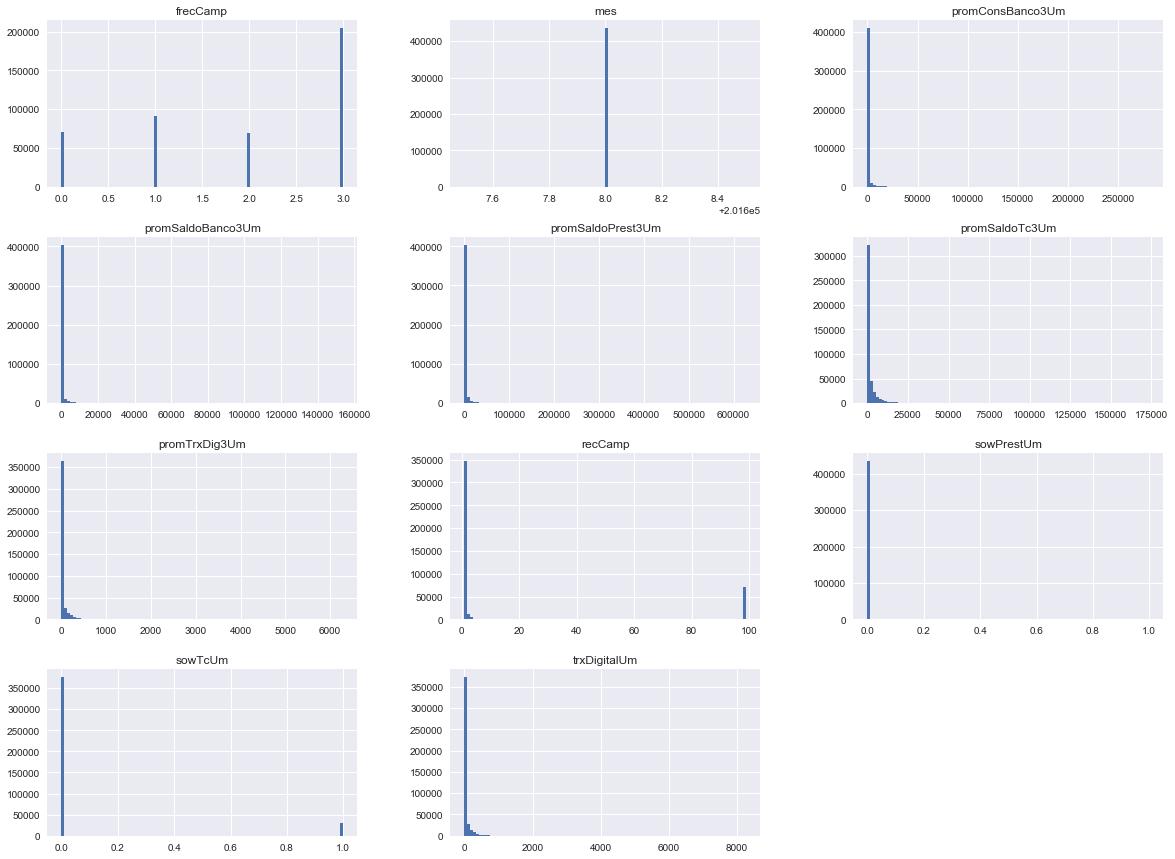

In [23]:
dfPresDigital[columnsNumeric].hist(bins = 100, figsize=(20,15))

Columnas categoricas

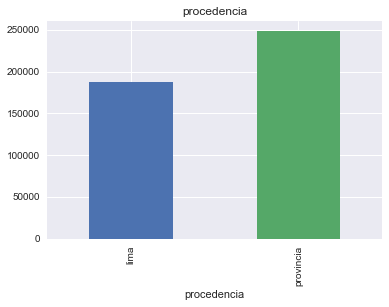

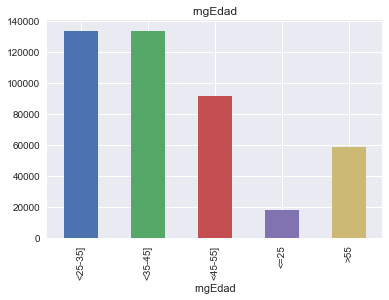

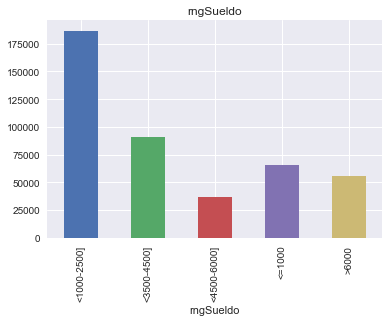

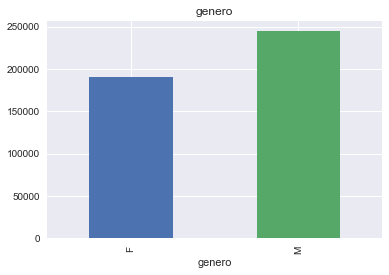

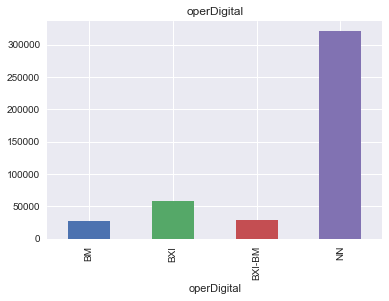

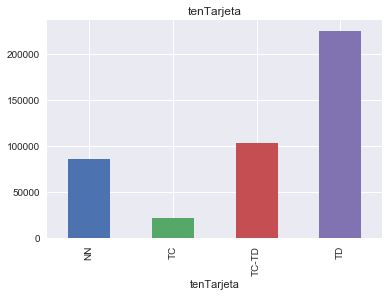

In [24]:
for columnName in columnsString:
  plt.title(columnName)
  dfPresDigital.fillna("--NULL").groupby(columnName)[columnName].count().plot(kind = "bar")
  plt.show()

### estudiar los nulos en el dataset

De las districuciones anteriores tenemos ya una idea del impacto de los nulos, repasando:

In [25]:
#Porcentaje y número de nulos por variables
numTotal = dfPresDigital.shape[0]
for columnName in list(set(columnsString).union(set(columnsNumeric))):
  numNull = dfPresDigital[dfPresDigital[columnName].isnull()].shape[0]
  if numNull > 0:
    print(columnName)
    print("Número de valores null: " + str(numNull))
    print("Porcentaje: " + str(np.round(numNull * 100 / numTotal, 2)) + "%")
    print("\n")

Como se observa ya no existen valores nulos en las variables

### 4. Estudiar los outliers

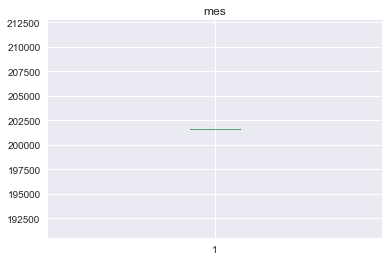

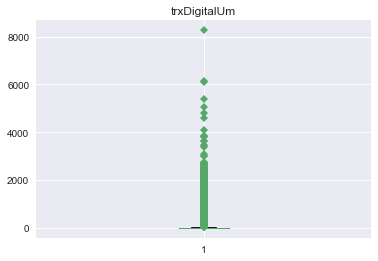

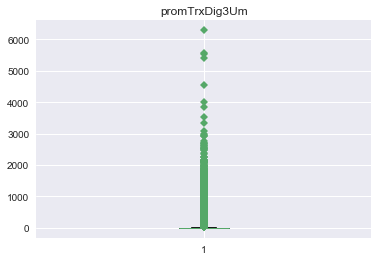

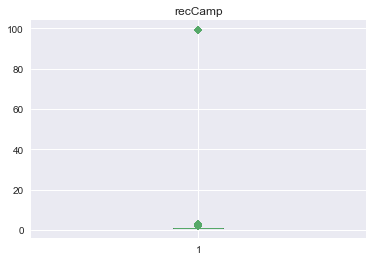

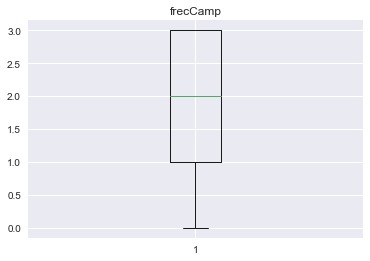

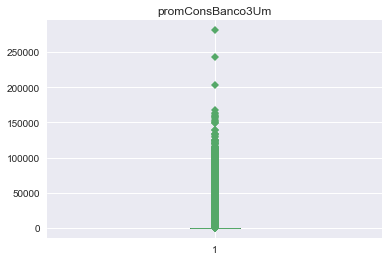

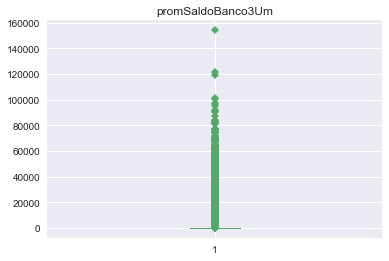

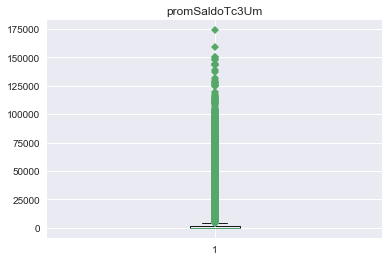

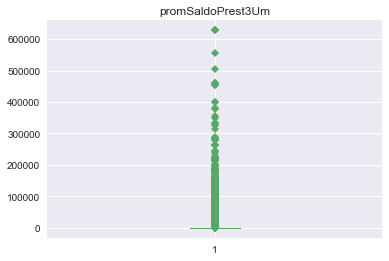

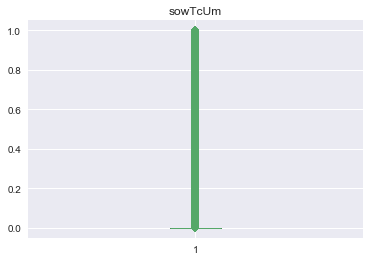

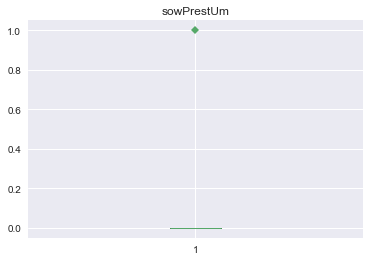

In [30]:
for columnName in dfPresDigital[columnsNumeric].columns:
  plt.title(columnName)
  
  plt.boxplot(dfPresDigital[columnName], 0, 'gD')
  
  plt.show()

In [31]:
# Función de Identificar Outliers:
def calculateNumOutliars(serie):
  Q01 = serie.quantile(0.25)
  Q03 = serie.quantile(0.75)
  IQR = Q03 - Q01
  a = (serie < (Q01 - 1.5 * IQR)) | (serie > (Q03 + 1.5 * IQR))
  numOutliars = a[a == True].shape[0]
  return numOutliars

In [32]:
#Porcentaje y número de outliars
numTotal = dfPresDigital.shape[0]
for columnName in columnsNumeric:
  numOutliars = calculateNumOutliars(dfPresDigital[columnName])
  if numOutliars > 0:
    
    numOutliarsLog = calculateNumOutliars(dfPresDigital[columnName].apply(np.log))
    
    print(columnName)
    if numOutliarsLog > 0:
      print("Número de valores outliars: " + str(numOutliars))
      print("Porcentaje: " + str(np.round(numOutliars * 100 / numTotal, 2)) + "%")
      print("Número de valores outliars con log: " + str(numOutliarsLog))
      print("Porcentaje con log: " + str(np.round(numOutliarsLog * 100 / numTotal, 2)) + "%")
    else:
      print("****aplicar log")
    
    print("\n")

trxDigitalUm
****aplicar log


promTrxDig3Um
****aplicar log


recCamp
Número de valores outliars: 88089
Porcentaje: 20.25%
Número de valores outliars con log: 88089
Porcentaje con log: 20.25%


promConsBanco3Um
****aplicar log


promSaldoBanco3Um
****aplicar log


promSaldoTc3Um
****aplicar log


promSaldoPrest3Um
****aplicar log


sowTcUm
****aplicar log


sowPrestUm
****aplicar log




### crear variables dummy en caso que sea conveniente

Para las variables categoricas se ha usado mean encoding

### estudiar que todas las variables ahora sí tengan el formato y contenido adecuado. si todavía no, arreglarlas.

Se verifica que los valores de las variables sean los adecuados

In [33]:
dfPresDigital.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435083 entries, 0 to 435082
Data columns (total 20 columns):
mes                  435083 non-null int64
cliente              435083 non-null object
estadoCliente        435083 non-null object
rngEdad              435083 non-null object
genero               435083 non-null object
rngSueldo            435083 non-null object
procedencia          435083 non-null object
operDigital          435083 non-null object
trxDigitalUm         435083 non-null int64
promTrxDig3Um        435083 non-null float64
recCamp              435083 non-null int64
frecCamp             435083 non-null int64
tenTarjeta           435083 non-null object
promConsBanco3Um     435083 non-null float64
promSaldoBanco3Um    435083 non-null float64
promSaldoTc3Um       435083 non-null float64
promSaldoPrest3Um    435083 non-null float64
sowTcUm              435083 non-null float64
sowPrestUm           435083 non-null int64
ventaPrestDig        435083 non-null int64
dtypes: f

### Antes de estudiar el comportamiento de las variables, veremos si hay alguna variable derivada a crear
### Definición de Target:

Ya se agregaron las variables necesarias en pasos anteriores.

In [34]:
dfPresDigital[columnTarget] = dfPresDigital["ventaPrestDig"]

In [35]:
print("Porcentaje de target: " + str(np.round(dfPresDigital[columnTarget].sum() * 100 / dfPresDigital.shape[0], 2)) + "%")

Porcentaje de target: 0.28%


Ejecutamos mean encoder

In [36]:
#Mean encoder
for columnName in columnsString:
  mapColumn = dfPresDigital.groupby(columnName)[columnTarget].mean()
  dfPresDigital[columnName + "_number"] = dfPresDigital[columnName].map(mapColumn)

In [37]:
columnsToEvaluate = columnsNumeric + [columnName + "_number" for columnName in columnsString]
print("Variables a evaluar: " + str(columnsToEvaluate))

Variables a evaluar: ['mes', 'trxDigitalUm', 'promTrxDig3Um', 'recCamp', 'frecCamp', 'promConsBanco3Um', 'promSaldoBanco3Um', 'promSaldoTc3Um', 'promSaldoPrest3Um', 'sowTcUm', 'sowPrestUm', 'procedencia_number', 'rngEdad_number', 'rngSueldo_number', 'genero_number', 'operDigital_number', 'tenTarjeta_number']


In [38]:
for columnName in columnsNumeric:
  dfPresDigital[columnName].fillna(dfPresDigital[columnName].mean(), inplace = True)

In [39]:
dfPresDigital.head(4)

,mes,cliente,estadoCliente,rngEdad,genero,rngSueldo,procedencia,operDigital,trxDigitalUm,promTrxDig3Um,...,sowTcUm,sowPrestUm,ventaPrestDig,target,procedencia_number,rngEdad_number,rngSueldo_number,genero_number,operDigital_number,tenTarjeta_number
0,201608,1,A,<35-45],M,<3500-4500],lima,NN,0,0.000000,...,1.0,0,0,0,0.002893,0.001789,0.002713,0.003336,0.000671,0.004553
1,201608,2,A,<25-35],M,<3500-4500],lima,BXI-BM,200,192.666667,...,0.0,0,0,0,0.002893,0.004619,0.002713,0.003336,0.013022,0.004553
2,201608,3,A,<35-45],F,<4500-6000],lima,BM,407,332.333333,...,0.0,0,0,0,0.002893,0.001789,0.002576,0.002047,0.011814,0.003154
3,201608,4,A,<25-35],F,<3500-4500],lima,NN,0,0.000000,...,1.0,0,0,0,0.002893,0.004619,0.002713,0.002047,0.000671,0.000199


In [40]:
#Evaluamos la varianza de las variables nuevas categoricas
dfPresDigital[[x + "_number" for x in columnsString]].var()

procedencia_number    1.103055e-08
rngEdad_number        6.934099e-06
rngSueldo_number      3.166203e-07
genero_number         4.086416e-07
operDigital_number    1.598511e-05
tenTarjeta_number     2.402576e-06
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F49A029E8>,
      dtype=object)

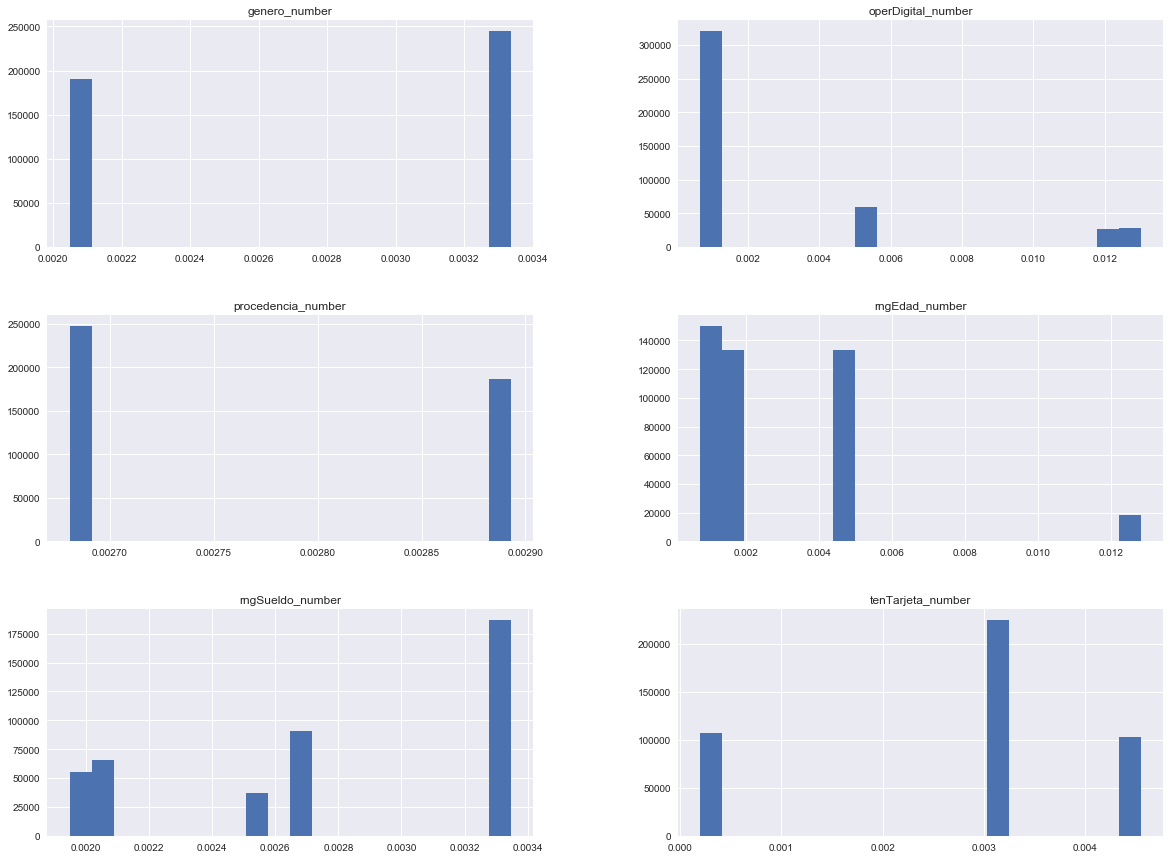

In [41]:
dfPresDigital[[x + "_number" for x in columnsString]].hist(bins = 20, figsize=(20,15))

## 6. Estandarizamos

In [42]:
# Creamos el objeto para escalar
#scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaler = preprocessing.StandardScaler()

# Lo aplicamos
for columnName in columnsNumeric:
  dfPresDigital[columnName] = scaler.fit_transform(dfPresDigital[columnName].values.reshape(-1, 1))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConv

In [43]:
dfPresDigital[columnsNumeric].head()

,mes,trxDigitalUm,promTrxDig3Um,recCamp,frecCamp,promConsBanco3Um,promSaldoBanco3Um,promSaldoTc3Um,promSaldoPrest3Um,sowTcUm,sowPrestUm
0,0.0,-0.331530,-0.341882,-0.44153,0.924803,1.086986,2.113434,0.746825,-0.214486,3.077828,-0.001516
1,0.0,1.224875,1.341741,-0.44153,0.924803,-0.178059,-0.193919,0.135925,-0.214486,-0.363950,-0.001516
2,0.0,2.835755,2.562223,-0.44153,0.924803,-0.178059,-0.193919,0.222870,-0.214486,-0.363950,-0.001516
3,0.0,-0.331530,-0.341882,-0.44153,-0.814921,-0.163411,-0.167202,-0.376052,-0.214486,3.077828,-0.001516
4,0.0,-0.331530,-0.341882,-0.44153,-0.814921,-0.178059,-0.193919,-0.389206,-0.214486,-0.363950,-0.001516


## 7. Asignación de Muestra Train - Test

Selecionamos una muestra

In [44]:
X = dfPresDigital[columnsToEvaluate].values
y = dfPresDigital[[columnTarget]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 43)

Aplicamos mean encoder a las variables categoricas

### crear la matriz de correlación

In [45]:
pdX_train = pd.DataFrame(X_train, columns = columnsToEvaluate)
pdy_train = pd.DataFrame(y_train, columns = ["target"])
pdX_test = pd.DataFrame(X_test, columns = columnsToEvaluate)
pdy_test = pd.DataFrame(y_test, columns = ["target"])

### pintar la matriz de correlación

In [46]:
pdX_train.corr()

,mes,trxDigitalUm,promTrxDig3Um,recCamp,frecCamp,promConsBanco3Um,promSaldoBanco3Um,promSaldoTc3Um,promSaldoPrest3Um,sowTcUm,sowPrestUm,procedencia_number,rngEdad_number,rngSueldo_number,genero_number,operDigital_number,tenTarjeta_number
mes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trxDigitalUm,NaN,1.000000,0.948522,-0.037273,0.071760,0.172104,0.194485,0.126101,-0.029827,0.288456,0.002188,0.067524,0.160240,-0.084065,0.034307,0.636868,0.256958
promTrxDig3Um,NaN,0.948522,1.000000,-0.041024,0.074780,0.182743,0.204902,0.132936,-0.031697,0.300753,0.002456,0.063512,0.165435,-0.090708,0.034769,0.644558,0.267013
recCamp,NaN,-0.037273,-0.041024,1.000000,-0.742052,-0.009803,-0.016761,0.006179,0.032891,-0.051487,-0.000800,0.016723,0.082328,0.030900,0.020724,-0.038662,-0.088077
frecCamp,NaN,0.071760,0.074780,-0.742052,1.000000,0.014387,0.020387,-0.028620,-0.062407,0.077819,-0.001475,0.044224,-0.113575,-0.062271,-0.031337,0.075276,0.142099
promConsBanco3Um,NaN,0.172104,0.182743,-0.009803,0.014387,1.000000,0.636183,0.382488,0.013842,0.319349,0.005354,0.025315,-0.004279,-0.131207,0.036348,0.160946,0.141229
promSaldoBanco3Um,NaN,0.194485,0.204902,-0.016761,0.020387,0.636183,1.000000,0.588392,-0.008665,0.464796,0.006830,0.040614,-0.003004,-0.143459,0.036169,0.186828,0.165283
promSaldoTc3Um,NaN,0.126101,0.132936,0.006179,-0.028620,0.382488,0.588392,1.000000,0.026372,0.179378,0.004745,0.066440,-0.059104,-0.175450,0.029636,0.120938,0.041228
promSaldoPrest3Um,NaN,-0.029827,-0.031697,0.032891,-0.062407,0.013842,-0.008665,0.026372,1.000000,-0.044111,0.002445,-0.044820,-0.047462,-0.028625,0.010680,-0.044413,-0.056704
sowTcUm,NaN,0.288456,0.300753,-0.051487,0.077819,0.319349,0.464796,0.179378,-0.044111,1.000000,0.003750,0.051755,0.115831,-0.113367,0.023343,0.316751,0.297760


### determinar qué par de variables están correlacionadas

In [47]:
for columnName in columnsToEvaluate:
  dfPresDigital_corr = pdX_train.corr()[columnName]
  df_numerical_most_corr = dfPresDigital_corr[(abs(dfPresDigital_corr) > 0.5) & (abs(dfPresDigital_corr) < 1.0)]
  if df_numerical_most_corr.shape[0] > 0:
    print(columnName)
    print(df_numerical_most_corr)
    print("\n")

trxDigitalUm
promTrxDig3Um         0.948522
operDigital_number    0.636868
Name: trxDigitalUm, dtype: float64


promTrxDig3Um
trxDigitalUm          0.948522
operDigital_number    0.644558
Name: promTrxDig3Um, dtype: float64


recCamp
frecCamp   -0.742052
Name: recCamp, dtype: float64


frecCamp
recCamp   -0.742052
Name: frecCamp, dtype: float64


promConsBanco3Um
promSaldoBanco3Um    0.636183
Name: promConsBanco3Um, dtype: float64


promSaldoBanco3Um
promConsBanco3Um    0.636183
promSaldoTc3Um      0.588392
Name: promSaldoBanco3Um, dtype: float64


promSaldoTc3Um
promSaldoBanco3Um    0.588392
Name: promSaldoTc3Um, dtype: float64


operDigital_number
trxDigitalUm     0.636868
promTrxDig3Um    0.644558
Name: operDigital_number, dtype: float64




Obtenemos el valor de significacia de cada variable

### estudiar los pares de variables correlacionadas para quedarse solamente con una del par

In [48]:
pd1 = pdX_train.join(pd.DataFrame(y_train, columns = ["target"]))
print(pd1[["promConsBanco3Um", "target"]].corr())
print(pd1[["promSaldoBanco3Um", "target"]].corr())

                  promConsBanco3Um    target
promConsBanco3Um          1.000000  0.014541
target                    0.014541  1.000000
                   promSaldoBanco3Um    target
promSaldoBanco3Um           1.000000  0.018538
target                      0.018538  1.000000


Eliminamos "change_number" y con esto todas las correlaciones se resuelven

In [61]:
columnsToEvaluate.remove("change_number")

# 8. Modelado y Evaluación:

### Estandarizar variables

In [62]:
#Ya está Estandarizado

### 8.0 Random Forest (selección de variables):

In [49]:
rf = RandomForestClassifier(n_estimators = 10, random_state = 3)

# Entrenamiento del modelo
rf.fit(pdX_train[columnsToEvaluate], y_train);

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [50]:
# Extrayendo la importancia de variables:
importances = list(rf.feature_importances_)

In [51]:
# Ubicamos a la importancia y nombre de varoables en una lista
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(columnsToEvaluate, importances)]

# Ordenamos las variables conforme al grado de importancia
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Visualizamos la importancia de las variables:
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: promTrxDig3Um                  Importance: 0.19
Variable: promSaldoTc3Um                 Importance: 0.18
Variable: trxDigitalUm                   Importance: 0.16
Variable: promSaldoPrest3Um              Importance: 0.1
Variable: promConsBanco3Um               Importance: 0.08
Variable: promSaldoBanco3Um              Importance: 0.07
Variable: sowTcUm                        Importance: 0.04
Variable: rngEdad_number                 Importance: 0.03
Variable: rngSueldo_number               Importance: 0.03
Variable: operDigital_number             Importance: 0.03
Variable: frecCamp                       Importance: 0.02
Variable: procedencia_number             Importance: 0.02
Variable: tenTarjeta_number              Importance: 0.02
Variable: recCamp                        Importance: 0.01
Variable: genero_number                  Importance: 0.01
Variable: mes                            Importance: 0.0
Variable: sowPrestUm                     Importance: 0.0


### 8.1 Regresión Logística:

In [52]:
# Regresión Logístico:
classifier = LogisticRegression()
classifier.fit(pdX_train[columnsToEvaluate], y_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Predicción:

In [54]:
prediction_train = classifier.score(pdX_train[columnsToEvaluate], y_train)
prediction_test = classifier.score(pdX_test[columnsToEvaluate], y_test)

In [55]:
print('--------------------------')
print('    Indicador Training')
print('--------------------------\n')
print("Regresión logística - AUC: " + str(np.round(prediction_train * 100, 1)) + "%")
y_pred = classifier.predict(pdX_train[columnsToEvaluate])
print("Regresión logística - F1: " + str(np.round(f1_score(y_train, y_pred) * 100, 1)) + "%")

print('\n--------------------------')
print('    Indicador Testing')
print('--------------------------\n')
print("Regresión logística - AUC: " + str(np.round(prediction_test * 100, 1)) + "%")
y_pred = classifier.predict(pdX_test[columnsToEvaluate])
print("Regresión logística - F1: " + str(np.round(f1_score(y_test, y_pred) * 100, 1)) + "%")

--------------------------
    Indicador Training
--------------------------

Regresión logística - AUC: 99.7%
Regresión logística - F1: 0.0%

--------------------------
    Indicador Testing
--------------------------

Regresión logística - AUC: 99.7%
Regresión logística - F1: 0.0%


### 8.2 Arboles de Decisiones:

In [56]:
reg = DecisionTreeClassifier(max_depth = 10)
reg.fit(pdX_train[columnsToEvaluate], y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
prediction2_train = reg.score(pdX_train[columnsToEvaluate], y_train)
prediction2_test = reg.score(pdX_test[columnsToEvaluate], y_test)

In [58]:
print('\n--------------------------')
print('    Indicador Training')
print('--------------------------\n')
print("Árbol de decisión - AUC: " + str(np.round(prediction2_train * 100, 1)) + "%")
y_pred = reg.predict(pdX_train[columnsToEvaluate])
print("Árbol de decisión - F1: " + str(np.round(f1_score(y_train, y_pred) * 100, 1)) + "%")

print('\n--------------------------')
print('    Indicador Testing')
print('--------------------------\n')
print("Árbol de decisión - AUC: " + str(np.round(prediction2_test * 100, 1)) + "%")
y_pred = reg.predict(pdX_test[columnsToEvaluate])
print("Árbol de decisión - F1: " + str(np.round(f1_score(y_test, y_pred) * 100, 1)) + "%")


--------------------------
    Indicador Training
--------------------------

Árbol de decisión - AUC: 99.8%
Árbol de decisión - F1: 24.9%

--------------------------
    Indicador Testing
--------------------------

Árbol de decisión - AUC: 99.7%
Árbol de decisión - F1: 0.5%


### 8.3 Modelo GBoosting:

In [59]:
clf = GradientBoostingClassifier(n_estimators=200, max_depth = 4, learning_rate = .4)
clf.fit(pdX_train[columnsToEvaluate], pdy_train)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.4, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [60]:
prediction3_train = clf.score(pdX_train[columnsToEvaluate], pdy_train)
prediction3_test = clf.score(pdX_test[columnsToEvaluate], pdy_test)

In [61]:
print('\n--------------------------')
print('    Indicador Training')
print('--------------------------\n')
print("Modelo GBoost - AUC: " + str(np.round(prediction3_train * 100, 1)) + "%")
y_pred = clf.predict(pdX_train[columnsToEvaluate])
print("Modelo GBoost - F1: " + str(np.round(f1_score(y_train, y_pred) * 100, 1)) + "%")

print('\n--------------------------')
print('    Indicador Testing')
print('--------------------------\n')
print("Modelo GBoost - AUC: " + str(np.round(prediction3_test * 100, 1)) + "%")
y_pred = clf.predict(pdX_test[columnsToEvaluate])
print("Modelo GBoost - F1: " + str(np.round(f1_score(y_test, y_pred) * 100, 1)) + "%")


--------------------------
    Indicador Training
--------------------------

Modelo GBoost - AUC: 99.8%
Modelo GBoost - F1: 39.6%

--------------------------
    Indicador Testing
--------------------------

Modelo GBoost - AUC: 99.7%
Modelo GBoost - F1: 0.9%


## 9. Decisión:

De las ejecuciones hechas el mejor indicador sería el GBUST

In [62]:
print("Mejor modelo => GBoost - AUC: " + str(np.round(prediction3_test * 100, 1)) + "%")

Mejor modelo => GBoost - AUC: 99.7%


## 10. Réplica del modelo elegido:

In [63]:
# Luego de la elección del mejor modelo:
prediction = classifier.predict(pdX_train[columnsToEvaluate])

In [64]:
dataBaseFinal = pdX_train[columnsToEvaluate] 
dataBaseFinal['target'] = pd.DataFrame(y_train)
dataBaseFinal['prediction'] = pd.DataFrame(prediction)
dataBaseFinal.head()

,mes,trxDigitalUm,promTrxDig3Um,recCamp,frecCamp,promConsBanco3Um,promSaldoBanco3Um,promSaldoTc3Um,promSaldoPrest3Um,sowTcUm,sowPrestUm,procedencia_number,rngEdad_number,rngSueldo_number,genero_number,operDigital_number,tenTarjeta_number,target,prediction
0,0.0,-0.331530,-0.341882,-0.441530,0.924803,-0.178059,-0.193919,0.326282,-0.214486,-0.36395,-0.001516,0.002893,0.004619,0.003346,0.002047,0.000671,0.003154,0,0
1,0.0,1.863002,0.479540,-0.441530,0.924803,-0.178059,-0.193919,-0.052693,-0.214486,-0.36395,-0.001516,0.002681,0.000808,0.001947,0.002047,0.013022,0.003154,0,0
2,0.0,-0.331530,-0.341882,2.273848,-1.684784,-0.178059,-0.193919,-0.389206,0.054200,-0.36395,-0.001516,0.002681,0.001789,0.003346,0.003336,0.000671,0.003154,0,0
3,0.0,-0.331530,-0.341882,-0.441530,0.924803,-0.178059,-0.193919,-0.374581,-0.214486,-0.36395,-0.001516,0.002681,0.001789,0.003346,0.002047,0.000671,0.003154,0,0
4,0.0,-0.331530,-0.341882,-0.441530,0.924803,-0.172856,-0.184429,-0.009763,-0.214486,-0.36395,-0.001516,0.002681,0.000808,0.001947,0.002047,0.000671,0.004553,0,0
